In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#### Disclaimer: Esse material foi baseado em uma versão anterior preparada pelo Prof. Jacques Wainer. O link para os slides do Prof. Wainer está no Classroom da turma.

# Testes estatísticos de significância

- O papel de testes estatísticos é dar evidencias que dois (ou mais) conjuntos de dados não vieram da mesma fonte.

Você rodou 2 versões de um programa em vários dados:

- programa 1 demorou 10.30, 12.08, 9.33, 9.62, 9.88 (segundos) em 5 exemplos
- programa 2 demorou 9.23, 9.84, 8.55, 10.42 em outros 4 exemplos.

Há dois conjuntos de dados. Não existe teste para 2 números um contra o outro, só conjuntos de dados

- Dizer que os dois conjuntos de dados são “diferentes” é numa primeira aproximação dizer que esses dados vieram de duas fontes de dados (“populações”) diferentes.

- Ou melhor, dizer que dois conjuntos são **diferentes** é dizer que é bem **improvável** que os dados vieram da **mesma** fonte.


**Exemplo extraído do livro do Forsyth**

Imagine we hypothesize that the average human body temperature is 95F (35C). We collect temperature measurements $x_i$ from a random sample of $N$ people. The mean of this sample is unlikely to be 95F (35C). The sample will likely have too many people who run too hot, or too cool, to get exactly the number we expect. We must now find what caused the difference between the sample mean and the value we hypothesized. We could be wrong about the average body temperature. Alternatively, we could be right, and the difference might just be because the sample is randomly chosen. We can assess the significance of the evidence against the hypothesis by finding out what fraction of samples would give us sample means like the one we observe if the hypothesis is true.

## Erros de amostragem (ou ruídos de amostragem)

Dados retirados (amostrados) de uma mesma fonte podem ter médias diferentes. A diferença é apenas por causa da sorte ou do azar. Isso é chamado de *erro de amostragem*. O nome erro não é um bom nome, pense como *ruído de amostragem*

Vejamos um exemplo. Primeiro vamos gerar um população com 10.000 números aleatórios, com média 100 e desvio padrão 30.

In [92]:
np.random.seed(1234)
pop = np.random.normal(100,30,size=10000)

Vamos gerar um histograma para verificar se os dados se assemelham a uma distribuição normal realmente.

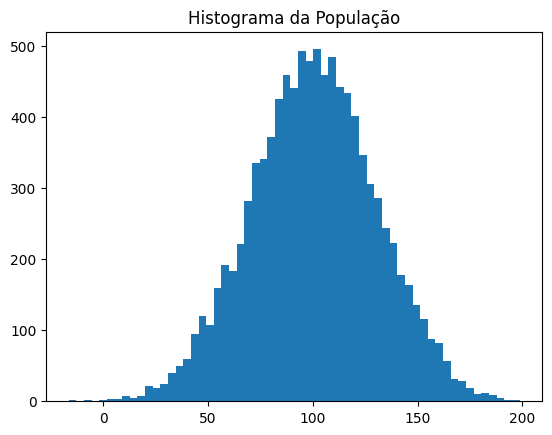

In [93]:
plt.hist(pop, bins='auto')
plt.title("Histograma da População")
plt.show()

Vamos gerar duas amostras vindas dessa população e calcular suas médias.

In [4]:
p1 = np.random.choice(pop, 10)
np.mean(p1)

97.61602493238965

In [5]:
p2 = np.random.choice(pop, 12)
np.mean(p2)

106.78490298465518

Vamos assumir que **p2** são os tempos de execução do seu programa e **p1** são os tempos de execução de um programa conhecido publicado na literatura, e seu mestrado é fazer uma implementação mais rápida do programa **p1**

Voce pode dizer a sua orientadora que vc terminou o mestrado ja que voce criou um programa que é por volta de **X**% mais rápido que o estado da arte? Rode várias vezes as células acima e veja se é possível fazer alguma afirmação.

## Teste

Um teste estatístico informa a probabilidade de que os dados sejam tão (ou mais) diferentes quanto eles são tendo em vista que eles vieram da mesma fonte de dados. Esse valor é chamado de *p-valor* ou *p-value*

Se a probabilidade é alta então é provável que a diferença que voce encontrou na média (ou outras medidas - mais abaixo) é apenas devido a sorte (ruído de amostragem).

Se a probabilidade é baixa então voce pode dizer que é pouco provável que os dados vieram de uma mesma fonte, ou 

Se a probabilidade é baixa voce pode dizer que é bem provável que os dados realmente vieram de 2 fontes diferentes.

O termo oficial para dizer que *é bem provável que os dados realmente vieram de 2 fontes diferentes* é a **diferença é estatisticamente significante** ou **a diferença é estatisticamente significativa**

**Definição de p-valor no livro do Forsyth**

The *p-value* represents the fraction of samples that would give a more extreme value of the test statistic than that observed, if the hypothesis was true.

### Test Student T-test
Vamos aplicar o teste Student T-test para as duas amostras dos programas **p1** e **p2** acima. 

In [6]:
stats.ttest_ind(p1,p2)


Ttest_indResult(statistic=-0.7288686259977082, pvalue=0.47453134928399654)

Vamos agora gerar uma amostra de tamanho parecido mas sabidamente com distribuição diferente e rodar novamente o teste contra a nossa amostra p1.

In [35]:
a = np.random.normal(150,30,size=12)
print(a)

[184.69774376 145.68338199 148.1152241  144.53880962 140.27896393
 189.74013388 164.15271868 140.73252775 142.25038003 157.36451562
 133.10708729 151.64674637]


In [20]:
stats.ttest_ind(p1,a)

Ttest_indResult(statistic=-3.9432460844483317, pvalue=0.0006925788114184218)

Compare os resultados dos dois testes acima. Veja a diferença dos *pvalues* gerados. Faz sentido?

### Valor usado como decisão: *p < 0.05*

Tradicionalmente, na maioria das Ciências e em particular em Computação usa-se o valor de 0.05 de p-valor para afirmar que a diferença é estatisticamente significante

Na prática, se o p-valor do seu teste der 0.051 você não tem um paper para publicar!!!

Há criticas sobre usar o p-valor como decisão, e veremos isso numa próxima aula, mas tradicionalmente essa é a prática.

### Testes não paramétricos

Usados quando os parâmetros de distribuição não são conhecidos. Ex: Vamos repetir os testes acima usando o teste de Wilcoxon. Inciando pelo Wilcoxon rank sums, não pareado.

In [37]:
stat, p = stats.ranksums(p1,p2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.231, p=0.817
Probably the same distribution


In [38]:
stat, p = stats.ranksums(p1,a)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-3.060, p=0.002
Probably different distributions


#### Teste Wilcoxon Pareado

Se você passar apenas um parâmetro, você estará fazendo um teste usando as diferenças entre dois conjuntos de dados.

In [25]:
stat, p = stats.wilcoxon(p1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.000, p=0.002
Probably different distributions


Teste de dados pareados precisa ter o mesmo número de valores em ambos os conjuntos.

In [13]:
p1 = np.random.choice(pop, 12)  #p1 tem agora mesmo tamanho de p2

stat, p = stats.wilcoxon(p1,p2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=33.000, p=0.677
Probably the same distribution


In [36]:
stat, p = stats.wilcoxon(p1,a)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=2.000, p=0.001
Probably different distributions


## Resumo: teste estatísticos

- Você tem dois conjuntos de dados A e B.

- Assuma que eles vieram de uma mesma fonte de dados F (cujos detalhes você não sabe). Isso é chamado de hipótese nula.

- Calcule a probabilidade que 2 amostras dessa fonte F tenham as médias tão diferentes quanto as médias de A e B. Essa probabilidade é chamada de p-valor

- Se o p-valor é alto, então é mais provável que A e B venham dessa mesma fonte e a diferença nas médias é apenas devido a “sorte”

- Se o p-valor for baixo então há baixa chance que dados tão diferentes quanto os de A e B tenham vindo desta mesma fonte F. Se eles vieram de “fontes diferentes” então a diferença entre eles não é apenas por causa da sorte.

- Em Ciência em geral, assume-se que p-valores menores que 0.05 (ou 95% de confiança) são evidência suficiente que os dados não vieram de uma mesma fonte.

- Assim, se o p-valor é baixo (<0.05), você tem alguma evidência que os conjuntos de dados são realmente diferentes (não vieram da mesma fonte) e diz-se que a diferença é **estatisticamente significante** (com 95% de confiança)

- Se o p-valor é alto (>0.05) não há nada que você pode dizer. Você **não** mostrou que os dados são **semelhantes** ou **iguais**. Você apenas não conseguiu mostrar que eles são diferentes!!!

- Assim normalmente você quer um p-valor baixo

- O papel de testes estatísticos é dar evidencias que a diferença entre a média de dois (ou mais) *conjuntos* de dados não é devido apenas a sorte (ou ao ruído de amostragem)

- Exemplos de uso de testes em Python (incluindo os de Wilcoxon acima): https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/
- Veja material do Prof. Wainer para instruções sobre rodar os testes em R.

# Intervalo de Confiança (IC)

**Definição do livro do Forsyth**

Choose some fraction $f$ . An $f$ confidence interval for a population mean is an interval constructed using the sample mean. It has the property that for that fraction $f$ of all samples, the population mean will lie inside the interval constructed from each sample’s mean.

Antes de entendermos o que é o intervao de confiança, vamos relembrar sobre um método chamado *Bootstraping*. Esse método pode ser interessante quando repetir um experimento muitas vezes é muito custoso.

Suponha que você tem um conjunto de dados de tamanho $n$. O método consiste nos seguintes passos:

 1. Crie uma amostra *Bootstrapped*: Selecione $n$ itens aleatoriamente, com reposição, do conjunto de dados original.
 2. Calcule a estatística de interesse (média? mediana?, etc)
 3. Armazene o valor calculado
 4. Repita os passos 1->3 muitas vezes (milhares)
 
 Crie um histograma com os valores calculados. O Intervalo de confiança (IC) 95% é o intervalo que cobre 95% das estatíticas computadas com bootstrap. Existem outras maneiras de calcular IC através de fórmulas e etc, mas um dos principais atrativos do bootstrap é a flexibilidade de poder criar uma distribuição (visualizada no histograma) para calcular coisas como IC e SE (standard error) sem se preocupar se existe ou não uma fórmula. E funciona para qualquer estatística de interesse.
 
 Veja [aqui](https://www.youtube.com/watch?v=Xz0x-8-cgaQ&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=25) um vídeo ilustrando esse procedimento.

Vamos usar nosso conjunto de medidas p1, calculado acima, como exemplo para o bootstrap. Vamos usar a função bootstrap da *scipy*. Documentação [aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html) 

In [95]:
p1 = (p1,) #convertendo array para sequencia


In [96]:
#Default é 10k repetições
bootstrap_ci = stats.bootstrap(p1, np.mean, confidence_level=0.95,
                         random_state=1, method='BCa')

#IC 95% 
print(bootstrap_ci.confidence_interval)

ConfidenceInterval(low=87.29829940497147, high=102.95305195618425)


In [97]:
p1 = np.random.choice(pop, 30)  #aumentando o número de medidas
p1 = (p1,) #convertendo array para sequencia


In [98]:
#Default é 10k repetições
bootstrap_ci = stats.bootstrap(p1, np.mean, confidence_level=0.95,
                         random_state=1, method='BCa')

#IC 95% 
print(bootstrap_ci.confidence_interval)

ConfidenceInterval(low=92.14060307182682, high=113.63373426271494)


Note que o `method="BCa"` é uma forma para calcular o intervalo de confiança que faz algumas correções, que parece ser a mais aceita.

Um ponto muito interessante é que podemos entender ICs como **testes estatísticos feitos visualmente**. Se o IC acima cobre $95\%$ das médias, sabemos que qualquer valor fora desse intervalo tem menos de $5\%$ de chance de ocorrer. Em outras palavras, o *p-value* de qualquer valor fora do IC é $< 0,05$. Como vimos anteriormente, isso é o mesmo que dizer que valores fora do IC são significativamente diferentes. 

Veja [aqui](https://www.youtube.com/watch?v=TqOeMYtOc1w&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=23) um vídeo sobre intervalos de confiança.


Vamos comparar os intevalos de confiança dos dois conjuntos de dados abaixo:

In [108]:
d1 = np.random.normal(150,30,size=12)
d2 = np.random.normal(140,30,size=12)
print(d1)
print(d2)

[152.00580532 149.08290773 179.50145028 133.74259495 165.95843818
 157.27164217 227.02662124 151.40606832 137.85331197 132.96226501
 119.08042396 168.65611825]
[128.93068249 180.47450125 164.77046467 143.80489857 104.20406585
 203.73591703  97.88574146 117.44503905 173.67125357 157.73391097
 167.58482588 139.33439486]


In [109]:
#Default é 10k repetições
d1 = (d1,)
bootstrap_ci = stats.bootstrap(d1, np.mean, confidence_level=0.95,
                         random_state=1, method='BCa')

#IC 95% 
print(bootstrap_ci.confidence_interval)

ConfidenceInterval(low=144.2518742395628, high=176.27479351132635)


In [110]:
#Default é 10k repetições
d2 = (d2,)
bootstrap_ci = stats.bootstrap(d2, np.mean, confidence_level=0.95,
                         random_state=1, method='BCa')

#IC 95% 
print(bootstrap_ci.confidence_interval)

ConfidenceInterval(low=130.41691487552154, high=165.60809024188396)


Você consegue concluir algo comparando os ICs acima? Vamos repetir o processo com outros conjuntos de dados.

In [38]:
d1 = np.random.normal(150,30,size=12)
d2 = np.random.normal(180,30,size=12)
print(d1)
print(d2)

[ 87.19892414 183.01660825 127.82278191 133.46183434 171.37543851
 124.77586917 135.76417721 181.70968281 149.8272113  213.09851688
 166.72255474 130.61642215]
[214.99151297 159.99353118 161.1358613  200.74977031 163.64789943
 182.48547835 203.78620187 168.665836   171.03339903 189.73996452
 193.36213988 187.42333381]


In [39]:
#Default é 10k repetições
d1 = (d1,)
bootstrap_ci = stats.bootstrap(d1, np.mean, confidence_level=0.95,
                         random_state=1, method='BCa')

#IC 95% 
print(bootstrap_ci.confidence_interval)

ConfidenceInterval(low=132.25220989492144, high=169.3109365643268)


In [40]:
#Default é 10k repetições
d2 = (d2,)
bootstrap_ci = stats.bootstrap(d2, np.mean, confidence_level=0.95,
                         random_state=1, method='BCa')

#IC 95% 
print(bootstrap_ci.confidence_interval)

ConfidenceInterval(low=173.62249651966272, high=193.27302701754988)


E agora? Qual a conclusão? Repare que não há intersecção entre os ICs.
E se usássemos as mesmas distribuições originais do exemplo, mas tivéssemos bem mais dados?

In [111]:
#aumentando a quantidade de dados
d1 = np.random.normal(150,30,size=120)
d2 = np.random.normal(140,30,size=120)


In [112]:
#Default é 10k repetições
d1 = (d1,)
bootstrap_ci = stats.bootstrap(d1, np.mean, confidence_level=0.95,
                         random_state=1, method='BCa')

#IC 95% 
print(bootstrap_ci.confidence_interval)

ConfidenceInterval(low=149.73359509163757, high=160.75713852303136)


In [113]:
#Default é 10k repetições
d2 = (d2,)
bootstrap_ci = stats.bootstrap(d2, np.mean, confidence_level=0.95,
                         random_state=1, method='BCa')

#IC 95% 
print(bootstrap_ci.confidence_interval)

ConfidenceInterval(low=133.06252162476795, high=143.55564942906224)


Descobrir o tamanho necessário da amostra para atingir certa confiança é outro tópico de estudo em inferência estatística ... chamado de *Power analysis* 

## Outras maneiras de obter IC para a média

Caso você tenha uma amostra pequena ($n<30$), o mais adequado é usar a distribuição T para obter o intervalo.

In [26]:
p1 = np.random.choice(pop, 12)  #p1 tem menos que 30 elementos
stats.t.interval(0.95, df=len(p1)-1, loc=np.mean(p1), scale=stats.sem(p1))


(70.73694684043569, 97.59369835786664)

Com $n>30$ podemos usar a distribuição Normal.

In [28]:
p1 = np.random.choice(pop, 50)  #p1 tem menos que 30 elementos
stats.norm.interval(0.95, loc=np.mean(p1), scale=stats.sem(p1))

(87.3243919094869, 102.9833124163307)

## Resumo: Intervalos de confiança

- Intervalos de confiança indicam a incerteza que se tem sobre a média (ou mediana) da fonte que gerou os dados.

- Este [artigo](http://www.bmj.com/content/292/6522/746.short) que argumenta a favor de intervalos de confiança em vez de testes estatísticos.

- Se voce é o primeiro a publicar sobre um resultado, não há como compara-lo com o estado da arte. Assim voce deve apenas publicar o intervalo de confiança para o seu resultado.

- Se voce não consegue reproduzir o programa ou metodo da “competição” para fazer um teste estatístico, voce pode comparar apenas os intervalos de confiança!

# Tamanho de Efeito

- Testes estatísticos medem a confiança que existe uma diferença entre os 2 conjuntos de dados.

- Infelizmente, o nome *significante* parece indicar que a diferença é grande, ou importante.

- **Isso não é verdade**: um p-valor baixo apenas indica que voce tem bastante certeza que a diferença existe, não que ela é importante ou significante no sentido tradicional da palavra.

- **Tamanho do efeito** é uma família de medidas que medem o **tamanho da diferença entre os dois conjuntos**.

- São medidas adimensionais (sem unidade de dimensão: metro, pontos na prova, etc)

- Tamanho de efeito é comparável através de diferentes experimentos
- Esse é um aspecto frequentemente negligenciado em apresentação de resultados
- Esse é um [artigo interessante](https://machinelearningmastery.com/effect-size-measures-in-python/) introduzindo o conceito e falando sobre Python. Ele referência outros artigos advogando sobre o uso dessas *novas estatísticas*.

## Cohen D

- Tamanho de efeito para medidas numéricas.

- diferença das médias de A e B dividido pelo “desvio padrão” (adimensional)

- mede quão separado são as distribuições de dados de A e B. Veja essa [animação](http://rpsychologist.com/d3/cohend/).

- um D=0.2 significa que a diferença das médias de A e B é 0.2 do desvio padrão “delas”.

Há algumas definições diferentes para o Cohen D. A ideia é sempre a diferença das médias dividido pelo desvio padrão “dos dois conjuntos”. A questão é o que é o desvio padrão “dos conjuntos”. Há algumas possibilidades:

- o desvio padrão da união dos dois conjuntos. Nenhuma abordagem segue isso
-o desvio padrão de um só dos conjuntos (o conjunto “normal” ou de controle). Essa abordagem é chamada de delta de Glass.
- a média dos desvio padrão dos dois conjuntos. Essa abordagem não tem um nome próprio mas é usada de vez em quando.
-a média ponderada dos desvios padrão dos dois conjuntos. Essa abordagem é chamada de pooled standard variation.

Além do *Cohen D*, há uma medida derivada chamada *Hedge g* que é o Cohen D com *pooled standard variation* mas com um outro termo multiplicativo de correção que tem maior efeito para conjuntos menores. Esse parece ser a medida mais correta para usar em artigos, mas ela não é diferente do Cohen D se os dois conjuntos de dados são grandes.

Um exemplo baseado no artigo citado acima para cálculo do Cohen D em Python:

In [64]:
from math import sqrt
 
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = np.mean(d1), np.mean(d2)
	# calculate the effect size
	return (u1 - u2) / s
 
# seed random number generator
np.random.seed(1)

# prepare data
data1 = np.random.normal(150,30,size=120)
data2 = np.random.normal(140,30,size=120)

# calculate cohen's d
d = cohend(data1, data2)
print('Cohens d: %.3f' % d)

Cohens d: 0.243


## Comparável através de  experimentos

- Tamanho de efeito é comparável através de diferentes experimentos

- Combinar tamanho de efeito é o que meta-analises fazem!

- Cohen falou que um tamanho de efeito de 0.2 é pequeno. Na prática pode não ser.

- Há algumas meta-meta-análises que mostram quais são valores razoáveis em diferentes áreas:
    - [Engenharia de Software](http://www.sciencedirect.com/science/article/pii/S0950584907000195)
    - [Educação](http://onlinelibrary.wiley.com/doi/10.1111/j.1750-8606.2008.00061.x/full)
       - Por exemplo: 0.25 é a média de tamanhos de efeito para intervenções em educação básica.

## Intervalos de confiança para tamanho de efeito

- Tamanho do efeito é apenas 1 número. Assim como a média de um conjunto é apenas 1 número.

- Mas é possível definir um intervalo de incerteza para a média de um conjunto (fazendo pressuposições sobre a fonte F dos dados do conjunto).

- Da mesma forma é possível calcular um intervalo de confiança para tamanho de efeito

- Talvez esse seja o futuro. Veja esse [artigo](http://journals.sagepub.com/doi/abs/10.3102/0013189X031003025).

- Isso resume tudo que é importante: se o intervalo de confiança cruza o zero então tradicionalmente a diferença não é significativa.

- é possível também usar o bootstrap mas é um pouco mais complicado neste caso já que há dois conjuntos de dados que precisam ser bootstrap

# Problemas com testes estatísticos

## Múltiplos testes

- Se você repetir 20 vezes um teste que dá uma resposta errada com probabilidade 1/20, você terá em média 1 resposta errada! (isso é apenas uma aproximação - ver abaixo)

- O programa abaixo roda 20 vezes o t-test para duas amostras de 30 dados vindo da mesma gaussiana (media = 0 desvio padrão = 1)

In [115]:
# seed random number generator
np.random.seed(1234)

for  i in range(20):
    s, p = stats.ttest_ind(np.random.normal(0,1,size=30),np.random.normal(0,1,size=30))
    print(i, ': ', p)

0 :  0.7033952474581076
1 :  0.5453674324714679
2 :  0.3892422936448193
3 :  0.01093961422607721
4 :  0.5527009647186023
5 :  0.8793840347222406
6 :  0.9041080817282472
7 :  0.6810819820149319
8 :  0.30204828616399404
9 :  0.7947067633705829
10 :  0.41729006667602475
11 :  0.7422148743281939
12 :  0.5144796304033059
13 :  0.8838421715461109
14 :  0.17417083770946942
15 :  0.05895629073293432
16 :  0.7891414902657632
17 :  0.8114542537232545
18 :  0.8382658918784929
19 :  0.6182840670621655


- Veja que existem entradas com $p< 0.05$ ! Veja também que não há nada errado em usar o teste t nestes casos.

- Formalmente: a probabilidade que a repetição 20 vezes de um teste que erra $5\%$ não de errado nenhuma vez é $0.95^{20} = 0.36$.  Ou seja a probabilidade que pelo menos uma  das 20 vezes o teste de errado é $1-0.36 = 0.641−0.36=0.64$

## Múltiplos testes disfarçado de múltiplas variáveis

- Se você medir 20 variáveis, provavelmente uma delas “vai dar” uma diferença significativa.
- “Já que nos vamos fazer esse experimento caro/demorado, vamos também medir A, B, C, D …”

In [130]:
A = np.random.normal(0, 1, (15, 20))
B = np.random.normal(0, 1, (20, 20))

In [131]:
for  i in range(20):
    s, p = stats.ttest_ind(A[:,i],B[:,i])
    print(i, ': ', p)

0 :  0.4201974698913227
1 :  0.9741106534052254
2 :  0.6277430447454619
3 :  0.6066688280150345
4 :  0.6899965959270583
5 :  0.7826513346877251
6 :  0.21673463422285028
7 :  0.31307090851205854
8 :  0.595872344675489
9 :  0.07284595799846005
10 :  0.0061948899550782225
11 :  0.214232186272562
12 :  0.853589598511717
13 :  0.8237825925117864
14 :  0.16621232907459785
15 :  0.9309327544278054
16 :  0.951382550677923
17 :  0.6466669854726903
18 :  0.5163485739465714
19 :  0.5615843245083181


- Neste caso cada coluna da matriz é uma “variavel” diferente. Há 15 medidas por variável na matriz $A$ e 20 medidas por variável na matriz $B$.
- Mas todas as medidas para todas as variáveis vem da mesma gaussiana (média = 0 , sd = 1)
- Exitem entradas com diferença significativa?

## Múltiplos testes disfarçado de análise de subgrupos

- O teste para todos não deu $p<0.05$
- vamos testar apenas no subgrupo A, agora testar apenas o subgrupo B, agora apenas A e B juntos
- analise de subgrupo é comumente uma técnica para encontrar alguma diferença significativa. [Um professor de nutrição de Cornell com uma pesquisa](https://www.buzzfeed.com/stephaniemlee/brian-wansink-cornell-p-hacking?utm_term=.mf0BGdQArD#.tyl9jrWV6w) (possivelmente fraudulenta).
- por outro lado, descobrir que algo só funciona para um subgrupo é uma parte importante de pesquisa exploratória. Uma [discussao sobre isso](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2792383/)

In [223]:
# seed random number generator
np.random.seed(5)
a = np.random.normal(0, 1, 30)
b = np.random.normal(0, 1, 30)

print(stats.ttest_ind(a,b))
print(stats.ttest_ind(a[1:10],b[1:15]))
print(stats.ttest_ind(a[10:30],b[15:30]))
print(stats.ttest_ind(a[20:30],b[25:30]))

Ttest_indResult(statistic=-1.4190635553567554, pvalue=0.1612324045501739)
Ttest_indResult(statistic=0.10973227655570625, pvalue=0.9136635715442558)
Ttest_indResult(statistic=-1.6688731371109289, pvalue=0.10460446193560559)
Ttest_indResult(statistic=-2.4043004014735327, pvalue=0.03182773231367911)


## Múltiplos testes disfarçado de olhar os dados antes

- testes A/B para interface

- voce planejou fazer 1000 experimentos para cada lado (há toda uma teoria para calcular o tamanho de um experimento nn dado a diferença esperada entre as médias e uma outra medida chamada de (type II error ou [power](https://www.youtube.com/watch?v=VX_M3tIyiYk&t=215s) - que normalmente usa-se 80%)
- [Uma pagina sobre como calcular tamanho de teste A/B](https://www.invespcro.com/blog/calculating-sample-size-for-an-ab-test/)

- voce mede as diferença antes do final - “da uma olhada nos dados”. Veja exemplo abaixo.

In [212]:
np.random.seed(5555)
a = np.random.normal(0, 1, 1000)
b = np.random.normal(0, 1, 1000)
print(stats.ttest_ind(a,b))
for  i in range(50,1000,20):
    s, p = stats.ttest_ind(a[1:i],b[1:i])
    print(i, ': ', p)

Ttest_indResult(statistic=0.26235879386967453, pvalue=0.7930718846769321)
50 :  0.2830910584574366
70 :  0.3078493649666181
90 :  0.1975941981261971
110 :  0.14508611851809708
130 :  0.4983191060140969
150 :  0.26480078943382684
170 :  0.40196577798912636
190 :  0.48476026494124713
210 :  0.3503237332333837
230 :  0.3689951596182065
250 :  0.17358368304793856
270 :  0.06365539481489428
290 :  0.02072309291783904
310 :  0.025184941255738367
330 :  0.062462896205119314
350 :  0.08739695148193204
370 :  0.11498683642906364
390 :  0.13595024406708395
410 :  0.1273690703562663
430 :  0.08842135601125595
450 :  0.14646119023678783
470 :  0.1890907048265809
490 :  0.32496617201089484
510 :  0.5425862570144374
530 :  0.7417083190029592
550 :  0.8249649639364537
570 :  0.6972521871372959
590 :  0.9266256347159869
610 :  0.7701325090213561
630 :  0.8279548975495024
650 :  0.9116095950054678
670 :  0.79744038947685
690 :  0.8891457922693845
710 :  0.8482891626142557
730 :  0.8978316687922903
750 

## Múltiplos testes quando comparando vários conjuntos de dados: múltiplas comparações

- Testes como o ANOVA, Kruskal-Wallis só dão um p-valor para a hipótese nula: todos os conjuntos de dados vieram da mesma fonte.
- Se $p<0.05$, quais entre eles são significativamente diferentes e quais não? Isso é chamado de análise post hoc. 
- Uma idéia é fazer testes entre pares de conjuntos, e isso é chamado do [problema das múltiplas comparações](https://en.wikipedia.org/wiki/Multiple_comparisons_problem) 
- Há vários métodos para corrigir o valor dos p-valores de cada comparação (para valores mais altos).

## Outros Problemas

- p-valor $<0.05$ não é um mandamento divino - resultados úteis não foram publicados pois p-valor=0.06

- p-valor é uma função do “tamanho da diferença” entre os dois conjuntos e do número de dados:

  - p-valor muito baixo não significa que os dois conjuntos são muito diferentes. Para  n → ∞, p-valor vai para 0 ou 1.

  - p-valor alto não significa que os conjuntos são iguais, pode significar que você tem poucos dados. Em alguns casos voce quer mostrar que seu programa é tão rápido quanto um programa pago, mas o seu é livre. Ou que seu programa acerta tanto quanto um programa conhecido, mas o seu é mais rápido. Não da para usar p-valor para mostrar que 2 conjuntos são iguais (nesse sentido).

## O que isso significa?

- Variações do problema de múltiplos testes geram falsos positivos: afirmações que um fenômeno existe quando ele de fato não existe.

- De vez em quando isso é chamado de *p-hacking* mas o problema existe mesmo quando o pesquisador não tem más intenções
  - Existem técnicas para corrigir o *p-value* quando temos múltiplos testes, como *False Discovery Rate (FDR)*. 
  - Aqui um [vídeo](https://www.youtube.com/watch?v=HDCOUXE3HMM) sobre p-hacking e FDR.

- É por isso que para coisas importantes como saúde você deve duvidar que todo resultado que saiu em um só artigo - pode ser um falso positivo.

- [Blog](http://io9.gizmodo.com/i-fooled-millions-into-thinking-chocolate-helps-weight-1707251800) de um pesquisador que gerou um artigo “fake” que chocolate ajuda a emagrecer

- [Blog](https://fivethirtyeight.com/features/science-isnt-broken/) sobre problemas da Ciência

- Outro [Video](https://www.youtube.com/watch?v=tLM7xS6t4FE) interessante sobre isso.